## Data cleaning

Data cleaning is something data scientists spend a lot of time on. The problem with teaching data cleaning is that the problems you will face are incredibly diverse. In this Notebook you will just see a few issues. Excellent (much better, to be honest) overviews can be found [here](https://realpython.com/python-data-cleaning-numpy-pandas/) or [here](https://www.tutorialspoint.com/python/python_data_cleansing.htm). This Notebook will contain most information you will need for the first Assignment, however.



See example Notebook: data_cleaning

Combine the two files from the Fitbit project steps and survey data) into a single csv file, and clean up the variable weight. You will also need these cleaned data for the weekly assignment.

You will run into several issues. Try and solve them. Here are some hints:

- Different world regions use different encodings. How do you see this in the files? Look in the documentation of pd.read_csv() to load both files correctly. 
- Which variable is the key to combine both files?
- Are all values of weight plausible? What are you going to do about this?



In [37]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df_survey = pd.read_csv('survey.csv')
df_survey.head()



,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [38]:
df_steps = pd.read_csv('steps.csv',sep=';')
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, the two files share an identifier variable, *app*. You can join two dataframes using the Pandas `merge` function.

In [39]:
df = pd.merge(df_survey, df_steps, on = 'id') #'app' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some problems are already apparent with this small snapshot of the data: missing values (NaN) and a possible data entry error ("/" for the rating for case 1). However, with big data files we will need to validate our data a lot better. There are a few functions that are handy to get a grip on the data.

In [40]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


It is already apparent that `reviews`, and `ratings` are not numeric, though they should be given the nature of the data. Let's focus on ratings and try to clean that variable

In [41]:
df['weight'].value_counts() #Get all the values. This may be less useful when there are many values.

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
128.0     1
116.0     1
102.0     1
101.0     1
105.0     1
Name: weight, Length: 72, dtype: int64

There are three values that are problematic: the "/" we already discovered, and two ratings that are above 5.0. Let's create a new column that excludes them.

In [42]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

# To remove the values above 5 we need to create a function that we then apply to the entire column
def below_30(x):
    if(x < 30 or x > 200) : 
        return float('NaN')
    else: 
        return x

df['weight'] = df['weight'].apply(below_30)


Finally, we can make a plot of ratings:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


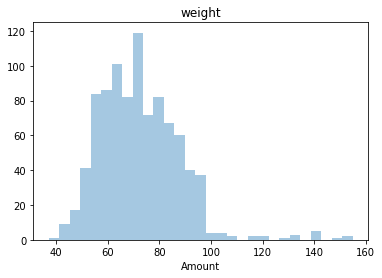

In [43]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('weight')
plt.xlabel('Amount')
plt.show()

This might seem like a lot of work that could be done much more easily in something like Excel. But there are  advantages going "the hard way":

* Your analysis is reproducible: everything is transparent, no fear of losing track of your steps.
* It works on very big data sets too.
